# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [42]:
# Loading in required libraries:pandas, seaborn and numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [43]:
# Reading in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

In [44]:
# Explore the data - are there missing values? How many entries do we have?
#display data
nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [45]:
#dataframe structure
print(nobel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB
None


### Dataframe information.

Nobel dataframe has 911 entries and 18 columns.No missing values for the first 7 columns and consist of two data types(2 int64 and 16 object). 




In [46]:
#number of entries
print(nobel.shape)

(911, 18)


In [47]:
#missing values
display(nobel.isnull().sum())

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [48]:
#datatypes and columns
nobel.dtypes.value_counts()

object    16
int64      2
dtype: int64

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [49]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(nobel['prize_share'].value_counts())


1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

### Prize share

344 Awarded to one Nobel laureate ,306 shared by two laureates,201 shared by 3 laureates and 60 shared by 4 winners.



In [50]:
# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())


Male      836
Female     49
Name: sex, dtype: int64

### Prizes won by male and female recipients

- 911 winners between 1901 and 2016. 
- 836  male, 49  female and remaining 26 are not identified by gender(perhaps won by organizations)
- Almost 95% of winners are males and 5% are females.

In [51]:
# Display the number of prizes won by the top 10 nationalities.
display(nobel['birth_country'].value_counts().head(10))

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

### Which countries win the most?

- United States of America is dominating by 259 laurates which is 45% of total top 10.

- Followed by United Kingdom with 85 laurates.


## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [52]:
# Calculating the proportion of USA born winners per decade
nobel.set_index('year')
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America' 
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

In [53]:
#groupby usa winners and decade
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [54]:
#display the proportions of USA born winners per decade
print(prop_usa_winners)

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.292683


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

[Text(0, 0.5, 'Proportion of USA Winners'),
 Text(0.5, 0, 'Years in Decade'),
 Text(0.5, 1.0, 'Proportion of US winners by decade')]

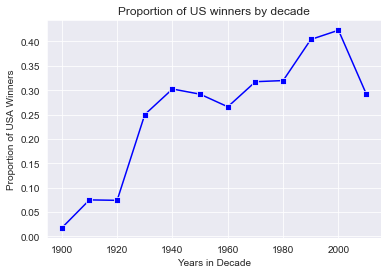

In [55]:
#using seaborn, plot the proportion of US winners by decade
sns.set_style('darkgrid')
usa = sns.lineplot(x='decade',y='usa_born_winner',data=prop_usa_winners,marker='s', color='blue')
usa.set(xlabel="Years in Decade", ylabel = "Proportion of USA Winners",title = "Proportion of US winners by decade")

What can you conclude from the graph?

- US dominate the Nobel charts by 25% in 1930 and continue to lead.
- There is a 10%  decline for usa born winners around 2010.

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [56]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()


[Text(0, 0.5, 'Proportion of Female Winners per Category'),
 Text(0.5, 0, 'Years in Decade'),
 Text(0.5, 1.0, 'Proportion of Female Winners by decade per category')]

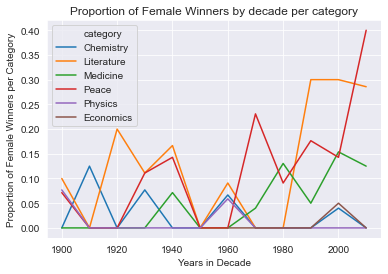

In [57]:
# Plotting female winners with % winners on the y-axis
female_plot = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)
female_plot.set(xlabel="Years in Decade", ylabel = "Proportion of Female Winners per Category",title="Proportion of Female Winners by decade per category")

 ### Interpretation
 
 - From the plot above,Peace category dominates the charts from 1960 and keeps on leading.
 - Followed by literature and medicine.
 - Other category like Physics ,Economics and Chemistry are not dominating amongs woman.

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [58]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.sex == "Female"].head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


### First woman to win a Nobel Prize

The first woman to win a Nobel Prize is Marie from Poland and the Nobel prize was shared among 3 other winners.

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [59]:
# Selecting the laureates that have received 2 or more prizes.
nobel.set_index('laureate_id')

from collections import Counter

counts = Counter(nobel.laureate_id)
nobel[nobel.laureate_id.isin([key for key in counts if counts[key] > 1])]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


### laureates that have received 2 or more prizes

- 1 laureate have received 3 Nobel Peace prizes. 

- 5 laureates received 2 Nobel prizes and this include the first famale to receive a Nobel prize.

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [60]:
# Converting birth_date from String to datetime
import datetime 
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['year'] = pd.to_datetime(nobel['year'],format='%Y')


In [61]:
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date']
nobel['age'] = (nobel['age']/365).dt.days
display(nobel[['age']])


,age
0,48.0
1,61.0
2,46.0
3,72.0
4,78.0
...,...
906,70.0
907,64.0
908,81.0
909,64.0


In [62]:
# What is the mean age of winners and it's standard devation? What is the median age?
display(nobel[['age']].describe())

,age
count,883.000000
mean,58.485844
std,12.403211
min,16.000000
25%,49.000000
50%,59.000000
75%,68.000000
max,89.000000


### Age summary statistics 

- Average age for laureates is 59.
- The spread among laureate's  age from the mean is 12.4
- The median age is 59.
- The age difference between the youngest person  and oldest is 73.

## 9. Age differences between prize categories


In [63]:
#Plot the age of nobel candidates by decade
age_diff_by_decade = nobel.groupby(['decade'], as_index=False)['age'].mean()


[Text(0, 0.5, 'Mean Age Per Decade '),
 Text(0.5, 0, 'Years in Decade'),
 Text(0.5, 1.0, 'Age of Nobel prize winners per Decade')]

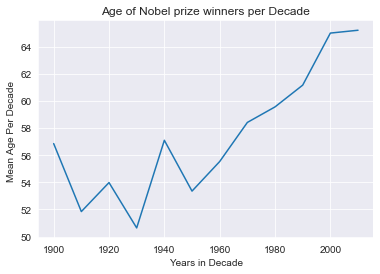

In [64]:
age_diff = sns.lineplot(x='decade', y='age', data=age_diff_by_decade)
age_diff.set(xlabel="Years in Decade", ylabel = "Mean Age Per Decade ",title = "Age of Nobel prize winners per Decade")


### Age difference by decade
- Mean age is steadly increasing by decade from 1950 to 2000.


In [65]:
# Plot the age of nobel candidates by decade and prize category
age_diff_by_decade_and_category = nobel.groupby(['decade','category'], as_index=False)['age'].mean()

[Text(0, 0.5, 'Mean  Age Per Decade'),
 Text(0.5, 0, 'Years in Decade'),
 Text(0.5, 1.0, "Winner's Age By Decade and Prize Category")]

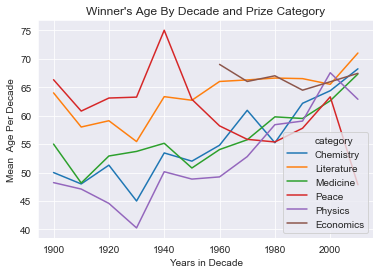

In [66]:
plot = sns.lineplot(x='decade', y='age', hue='category', data=age_diff_by_decade_and_category)
plot.set(xlabel="Years in Decade", ylabel = "Mean  Age Per Decade",title = "Winner's Age By Decade and Prize Category")


What can you conclude about the age at which people win different types of Nobel Prizes?

- Most people win Nobel prizes when they are above 60 years old.

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [67]:
#Youngest

nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
display(nobel[nobel['birth_date'] > '1991-01-01'])


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014-01-01,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,16.0


In [68]:
#Oldest
nobel['age'].max() 

89.0

### Oldest and youngest winners

Youngest person to win a Nobel prize was 16 ,Female from Pakistan and oldest was 89.

## Congratulations! You've reached the end of the challenge!